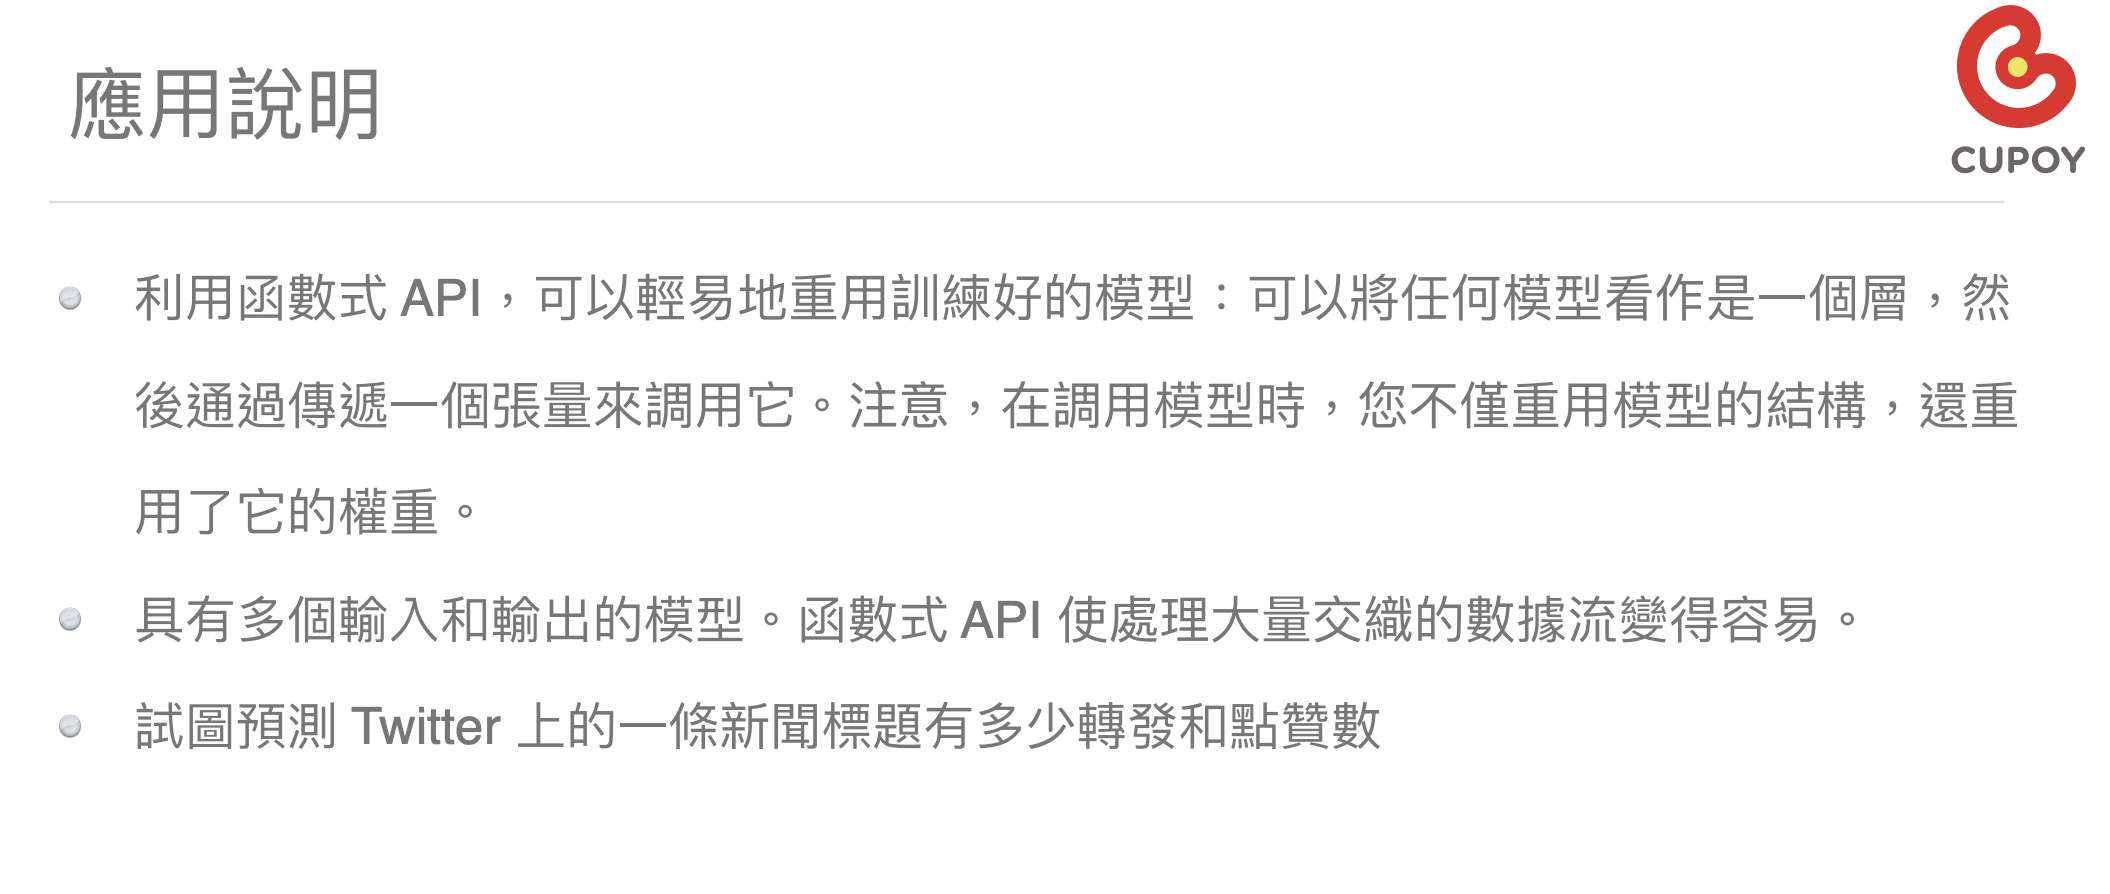

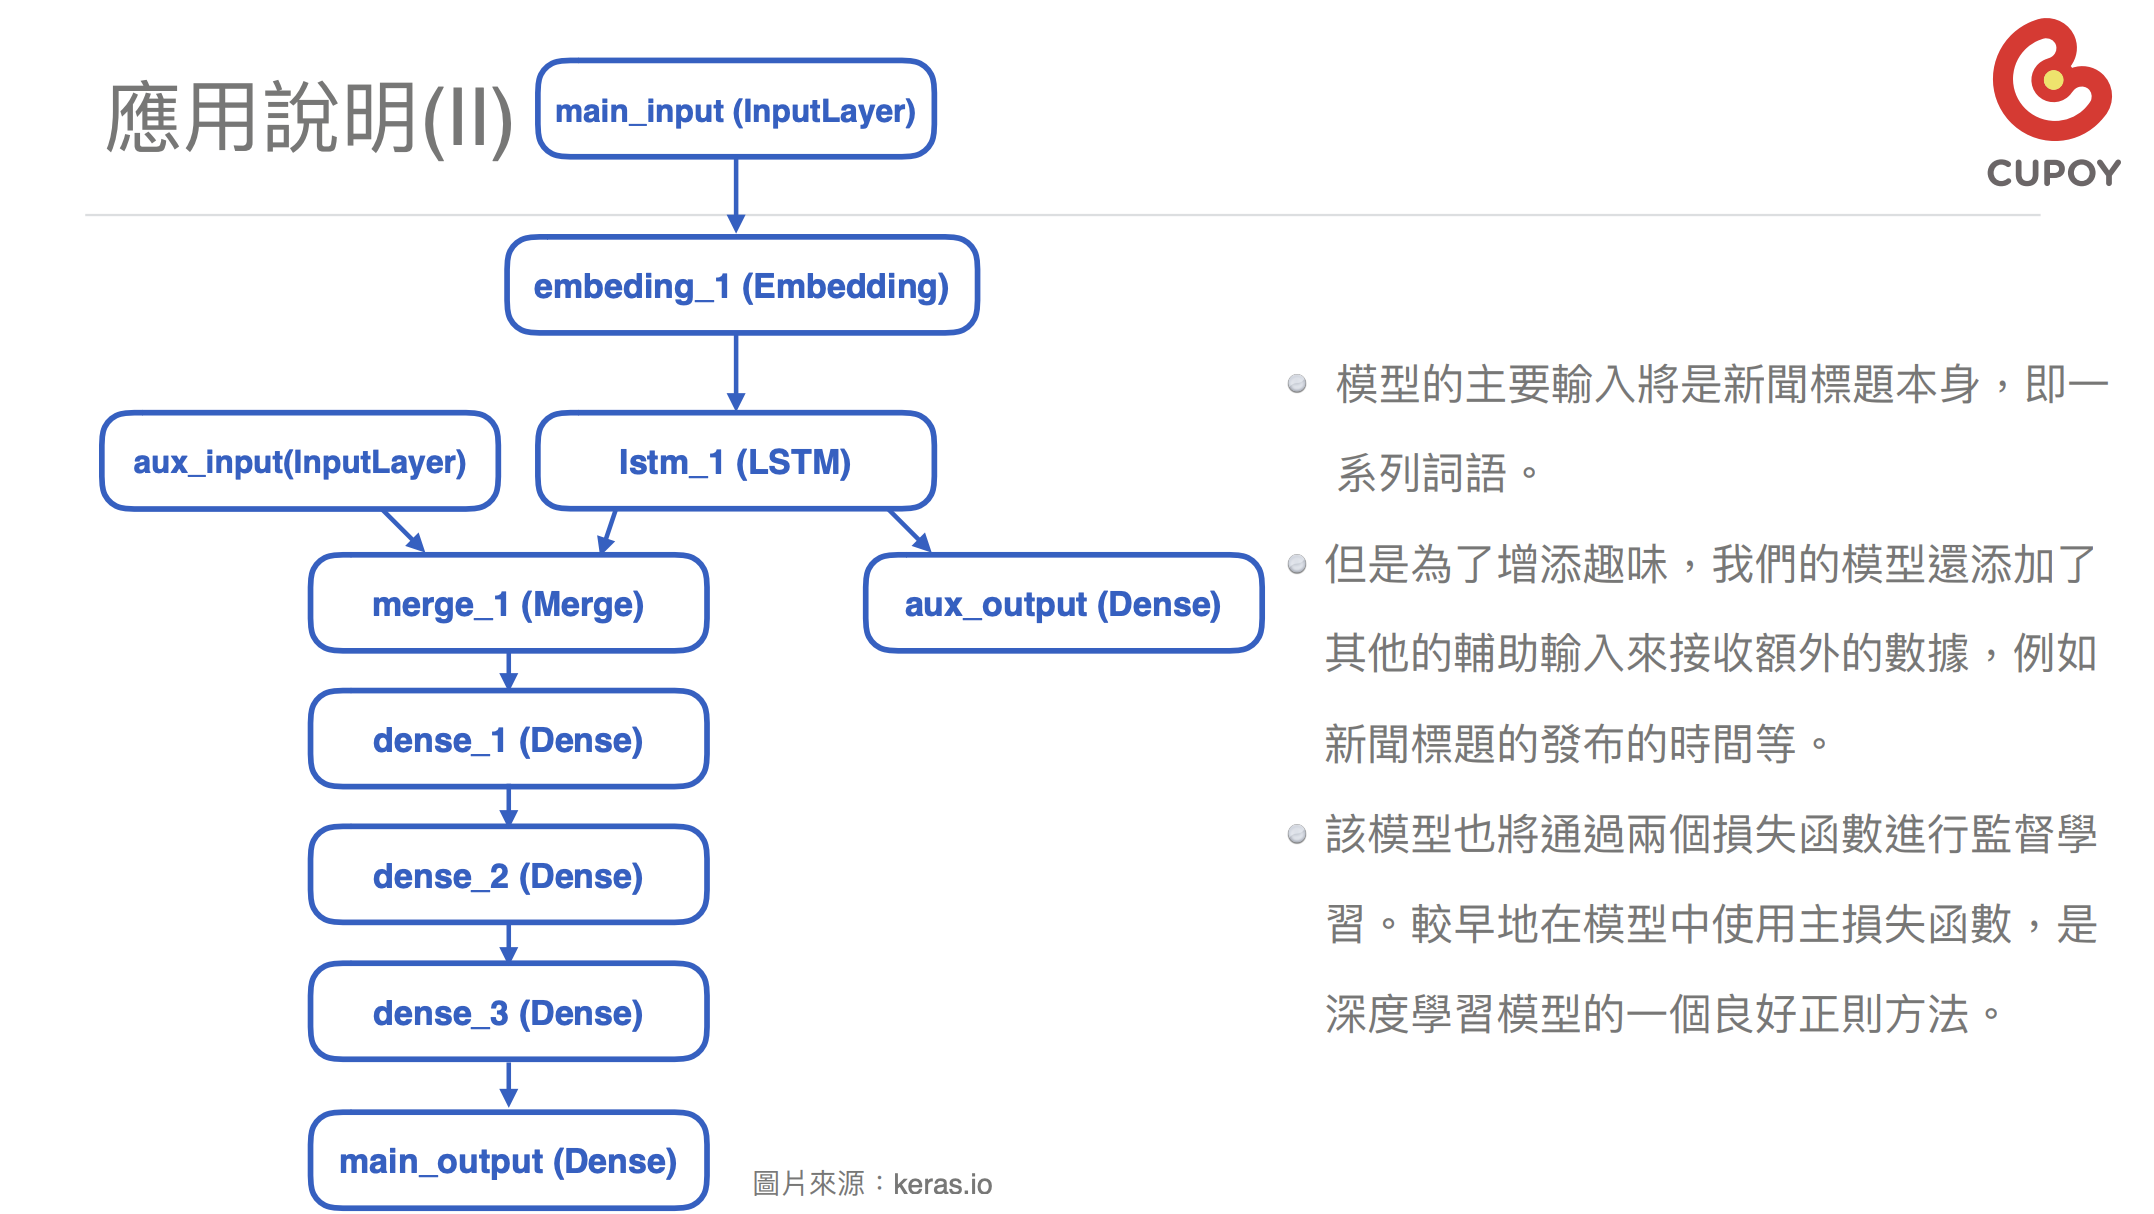

## 課程目標:

了解Keras 函數式 API 的使用

## 範例重點:

了解函數式 API 的彈性

In [1]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input(shape=(100,), dtype='int32', name='main_input')


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
lstm_out = LSTM(32)(x)

Using TensorFlow backend.
W0706 16:16:29.843477 4758410688 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 16:16:29.859390 4758410688 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 16:16:29.860260 4758410688 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [2]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
news_output = Dense(1, activation='sigmoid', name='news_out')(lstm_out)

In [3]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import keras
news_input = Input(shape=(5,), name='news_in')
x = keras.layers.concatenate([lstm_out, news_input])


# 堆疊多個全連接網路層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
#作業解答: 新增兩層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 最後添加主要的邏輯回歸層
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [4]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model(inputs=[main_input, news_input], outputs=[main_output, news_output])

In [5]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'news_out': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'news_out': 0.2})
model.summary()

W0706 16:16:30.108317 4758410688 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 16:16:30.124935 4758410688 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0706 16:16:30.131017 4758410688 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
news_in (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

In [6]:
model = None

## 作業:

請修改 Name 中, 自定義的 Layer 名稱

增加一層全連階層

宣告 MODEL API, 分別採用自行定義的 Input/Output Layer

model.summary 查看 Layers stack

In [7]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input(shape=(100,), dtype='int32', name='mainInput')


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
lstm_out = LSTM(32)(x)

In [8]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
news_output = Dense(1, activation='sigmoid', name='newsOutput')(lstm_out)

news_output_2 = Dense(1, activation='sigmoid', name='newsOutput_2')(lstm_out)

In [9]:
# 輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import keras
news_input = Input(shape=(5,), name='newsInput')
news_input_2 = Input(shape=(5,), name='newsInput_2')
x = keras.layers.concatenate([lstm_out, news_input, news_input_2])


# 堆疊多個全連接網路層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
#作業解答: 新增兩層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 最後添加主要的邏輯回歸層
main_output = Dense(1, activation='sigmoid', name='mainOutput')(x)

In [10]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model(inputs=[main_input, news_input, news_input_2], outputs=[main_output, news_output, news_output_2])

In [11]:
model.compile(optimizer='rmsprop',
              loss={'mainOutput': 'binary_crossentropy', 'newsOutput': 'binary_crossentropy', 
                    'newsOutput_2': 'binary_crossentropy'},
              loss_weights={'mainOutput': 1., 'newsOutput': 0.2,
                           'newsOutput_2': 0.2})
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mainInput (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 512)     5120000     mainInput[0][0]                  
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           69760       embedding_2[0][0]                
__________________________________________________________________________________________________
newsInput (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
newsInput_